### 라이브러리 불러오기

In [1]:
from PIL import Image
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Input, Flatten, Dense
from sklearn.model_selection import train_test_split

### 데이터 불러오기 + Resize 하기

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

600  images to be resized.
600  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

600  images to be resized.
600  images resized.
바위 이미지 resize 완료!


In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

600  images to be resized.
600  images resized.
보 이미지 resize 완료!


### 라벨링

In [5]:
def load_data(img_path, number_of_data=1800):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 1800 입니다.
x_train shape: (1800, 28, 28, 3)
y_train shape: (1800,)


### 이미지 불러오기

라벨:  0


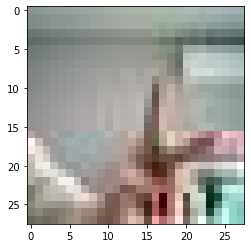

In [6]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계하기

In [7]:
# 가위바위보 데이터셋은 MNIST 데이터셋과 입력부, 출력부의 수가 달라졌다.
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=30

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(n_dense, activation='relu'))

model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

### 딥러닝 네트워크 학습시키기

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/30
57/57 [==============================] - 3s 4ms/step - loss: 1.0527 - accuracy: 0.4233
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.6267
Epoch 3/30
57/57 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.7417
Epoch 4/30
57/57 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.7694
Epoch 5/30
57/57 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8133
Epoch 6/30
57/57 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8494
Epoch 7/30
57/57 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8689
Epoch 8/30
57/57 [==============================] - 0s 3ms/step - loss: 0.3100 - accuracy: 0.8983
Epoch 9/30
57/57 [==============================] - 0s 3ms/step - loss: 0.2786 - accuracy: 0.8994
Epoch 10/30
57/57 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9222
Epoch 11/30
57/57 [

### 얼마나 잘 만들었는지 확인하기(테스트)

#### 데이터 불러오기 + Resize 하기

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 테스트 이미지 resize 완료!


In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 테스트 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 테스트 이미지 resize 완료!


In [11]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 테스트 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 테스트 이미지 resize 완료!


#### 라벨링

In [12]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, number_of_data=600)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

데이터의 이미지 개수는 600 입니다.


### test_accuracy 측정

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

19/19 - 0s - loss: 3.2934 - accuracy: 0.3867
test_loss: 3.293386697769165 
test_accuracy: 0.3866666555404663


- test_accuracy: 0.351666659116745
- test_accuracy: 0.3583333194255829
- test_accuracy: 0.43666666746139526
- test_accuracy: 0.36500000953674316
- test_accuracy: 0.3866666555404663

### 더 좋은 네트워크 만들어보기

#### 시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요?

- 학습 데이터에 과대적합 되었기 때문이다.

#### test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

- 검증 데이터도 사용하기
- 데이터 증식
- 드롭아웃
- early stopping, callback

### 검증데이터

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train,
                                                  test_size=0.2,
                                                  random_state=2023)

print("학습용 데이터: {}  레이블: {}".format(x_train.shape, y_train.shape))
print("검증용 데이터: {}  레이블: {}".format(x_val.shape, y_val.shape))
print("테스트용 데이터: {}  레이블: {}".format(x_test.shape, y_test.shape))

학습용 데이터: (1440, 28, 28, 3)  레이블: (1440,)
검증용 데이터: (360, 28, 28, 3)  레이블: (360,)
테스트용 데이터: (600, 28, 28, 3)  레이블: (600,)


### 더 좋은 딥러닝 네트워크 설계하기

In [15]:
# 가위바위보 데이터셋은 MNIST 데이터셋과 입력부, 출력부의 수가 달라졌다.
n_channel_1=32
n_channel_2=64
n_channel_3=128
n_train_epoch=200

model=keras.models.Sequential()

model.add(keras.Input(shape=(28,28,3)))

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [16]:
optimize=tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimize,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=10),
    keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch.keras',
    save_best_only=True,
    monitor='val_loss')
]

### 더 좋은 딥러닝 네트워크 학습시키기

In [18]:
history = model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/200
45/45 [==============================] - 1s 11ms/step - loss: 1.0898 - accuracy: 0.4076 - val_loss: 1.0792 - val_accuracy: 0.4056
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 1.0696 - accuracy: 0.5063 - val_loss: 1.0619 - val_accuracy: 0.4333
Epoch 3/200
45/45 [==============================] - 0s 5ms/step - loss: 1.0455 - accuracy: 0.5451 - val_loss: 1.0337 - val_accuracy: 0.6167
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 1.0169 - accuracy: 0.6264 - val_loss: 1.0098 - val_accuracy: 0.5417
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 0.9850 - accuracy: 0.6139 - val_loss: 0.9753 - val_accuracy: 0.6667
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 0.9477 - accuracy: 0.6306 - val_loss: 0.9469 - val_accuracy: 0.5639
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 0.9124 - accuracy: 0.6326 - val_loss: 0.9116 - val_accuracy: 0.6667
Epoch 8/200


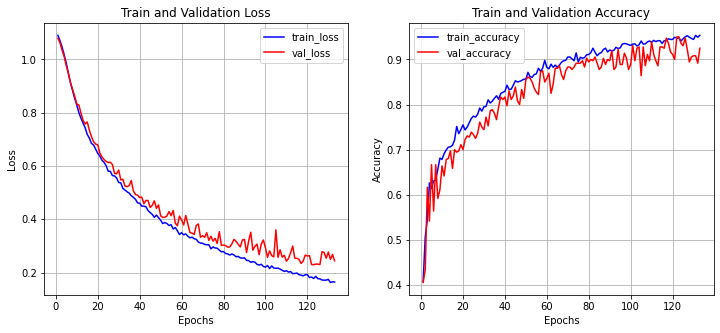

In [19]:
def history_dict(history_dict=history.history):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()
    
history_dict(history_dict=history.history)

### test_accuracy 측정

In [20]:
test_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_accuracy = test_model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

19/19 - 0s - loss: 1.7305 - accuracy: 0.4233
test_loss: 1.7305183410644531 
test_accuracy: 0.4233333468437195


- test_accuracy: 0.550000011920929
- test_accuracy: 0.503333330154419
- test_accuracy: 0.5
- test_accuracy: 0.5366666913032532
- test_accuracy: 0.4233333468437195

## Data Augmentation

In [21]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomContrast(0.5),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.5)
])

__참고문헌__
  
https://machinelearningmastery.com/image-augmentation-with-keras-preprocessing-layers-and-tf-image/

In [22]:
model1 = models.Sequential([
    
    Input(shape=(28,28,3)),
    
    data_augmentation,
    
    layers.Conv2D(n_channel_1, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(n_channel_2, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(n_channel_3, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    
    layers.Dense(3, activation='softmax')
])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 128)        

In [23]:
optimize=tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model1.compile(optimizer=optimize,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
callbacks1 = [
    keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=5),
    keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch1.keras',
    save_best_only=True,
    monitor='val_loss')
]

In [25]:
history1 = model1.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val), callbacks=callbacks1)

Epoch 1/200
45/45 [==============================] - 1s 8ms/step - loss: 1.0927 - accuracy: 0.3639 - val_loss: 1.0878 - val_accuracy: 0.4694
Epoch 2/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0868 - accuracy: 0.3951 - val_loss: 1.0805 - val_accuracy: 0.3972
Epoch 3/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0787 - accuracy: 0.4285 - val_loss: 1.0765 - val_accuracy: 0.3917
Epoch 4/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0734 - accuracy: 0.4250 - val_loss: 1.0674 - val_accuracy: 0.5278
Epoch 5/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0660 - accuracy: 0.4313 - val_loss: 1.0584 - val_accuracy: 0.4972
Epoch 6/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0600 - accuracy: 0.4424 - val_loss: 1.0472 - val_accuracy: 0.4694
Epoch 7/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0495 - accuracy: 0.4639 - val_loss: 1.0467 - val_accuracy: 0.4722
Epoch 8/200
4

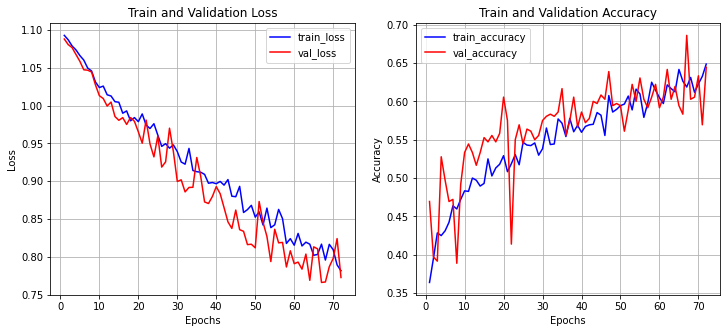

In [26]:
history_dict(history_dict=history1.history)

### test_accuracy 측정

In [27]:
test_model1 = keras.models.load_model('convnet_from_scratch1.keras')
test_loss, test_accuracy = test_model1.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

19/19 - 0s - loss: 0.9463 - accuracy: 0.5633
test_loss: 0.9463499188423157 
test_accuracy: 0.5633333325386047


- test_accuracy: 0.6483333110809326
- test_accuracy: 0.5299999713897705
- test_accuracy: 0.6483333110809326
- test_accuracy: 0.528333306312561
- test_accuracy: 0.5633333325386047

## Dropout만 추가

In [28]:
model2 = models.Sequential([
    
    Input(shape=(28,28,3)),
    
    layers.Conv2D(n_channel_1, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(n_channel_2, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(n_channel_3, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(3, activation='softmax')
])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [29]:
optimize=tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=optimize,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
callbacks2 = [
    keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=5),
    keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch2.keras',
    save_best_only=True,
    monitor='val_loss')
]

In [31]:
history2 = model2.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val), callbacks=callbacks2)

Epoch 1/200
45/45 [==============================] - 1s 7ms/step - loss: 1.0931 - accuracy: 0.3812 - val_loss: 1.0816 - val_accuracy: 0.4444
Epoch 2/200
45/45 [==============================] - 0s 5ms/step - loss: 1.0749 - accuracy: 0.4368 - val_loss: 1.0687 - val_accuracy: 0.5167
Epoch 3/200
45/45 [==============================] - 0s 5ms/step - loss: 1.0633 - accuracy: 0.4618 - val_loss: 1.0555 - val_accuracy: 0.6333
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 1.0482 - accuracy: 0.5063 - val_loss: 1.0427 - val_accuracy: 0.4889
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 1.0255 - accuracy: 0.5556 - val_loss: 1.0220 - val_accuracy: 0.5972
Epoch 6/200
45/45 [==============================] - 0s 5ms/step - loss: 1.0110 - accuracy: 0.5493 - val_loss: 1.0050 - val_accuracy: 0.5917
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 0.9883 - accuracy: 0.5861 - val_loss: 0.9878 - val_accuracy: 0.5444
Epoch 8/200
4

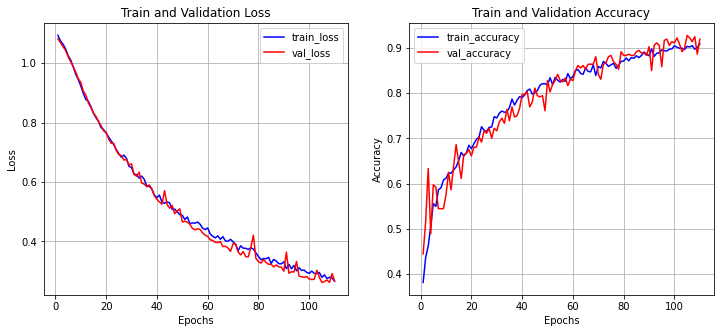

In [32]:
history_dict(history_dict=history2.history)

### test_accuracy 측정

In [33]:
test_model2 = keras.models.load_model('convnet_from_scratch2.keras')
test_loss, test_accuracy = test_model2.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

19/19 - 0s - loss: 1.1055 - accuracy: 0.5017
test_loss: 1.1055245399475098 
test_accuracy: 0.5016666650772095


- test_accuracy: 0.5833333134651184
- test_accuracy: 0.5400000214576721
- test_accuracy: 0.41333332657814026
- test_accuracy: 0.5816666483879089
- test_accuracy: 0.5016666650772095

## Data Augmentation + Dropout

In [34]:
model3 = models.Sequential([
    
    Input(shape=(28,28,3)),
    
    data_augmentation,
    
    layers.Conv2D(n_channel_1, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(n_channel_2, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(n_channel_3, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(3, activation='softmax')
])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 128)        

In [35]:
optimize=tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model3.compile(optimizer=optimize,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
callbacks3 = [
    keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=5),
    keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch3.keras',
    save_best_only=True,
    monitor='val_loss')
]

In [37]:
history3 = model3.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val), callbacks=callbacks3)

Epoch 1/200
45/45 [==============================] - 1s 12ms/step - loss: 1.1043 - accuracy: 0.3215 - val_loss: 1.0937 - val_accuracy: 0.3194
Epoch 2/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0978 - accuracy: 0.3444 - val_loss: 1.0920 - val_accuracy: 0.4222
Epoch 3/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0934 - accuracy: 0.3493 - val_loss: 1.0921 - val_accuracy: 0.3167
Epoch 4/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0939 - accuracy: 0.3583 - val_loss: 1.0874 - val_accuracy: 0.3944
Epoch 5/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0897 - accuracy: 0.3729 - val_loss: 1.0852 - val_accuracy: 0.3417
Epoch 6/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0876 - accuracy: 0.3931 - val_loss: 1.0798 - val_accuracy: 0.4667
Epoch 7/200
45/45 [==============================] - 0s 6ms/step - loss: 1.0813 - accuracy: 0.3944 - val_loss: 1.0765 - val_accuracy: 0.4500
Epoch 8/200


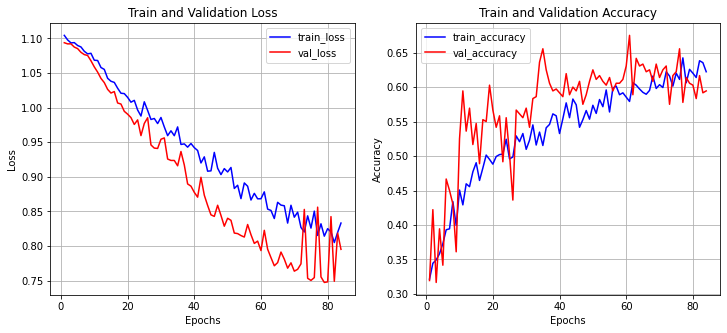

In [38]:
history_dict(history_dict=history3.history)

### test_accuracy 측정

In [39]:
test_model3 = keras.models.load_model('convnet_from_scratch3.keras')
test_loss, test_accuracy = test_model3.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

19/19 - 0s - loss: 0.9119 - accuracy: 0.6250
test_loss: 0.9119133353233337 
test_accuracy: 0.625


- test_accuracy: 0.4650000035762787
- test_accuracy: 0.476666659116745
- test_accuracy: 0.6416666507720947
- test_accuracy: 0.48500001430511475
- test_accuracy: 0.625

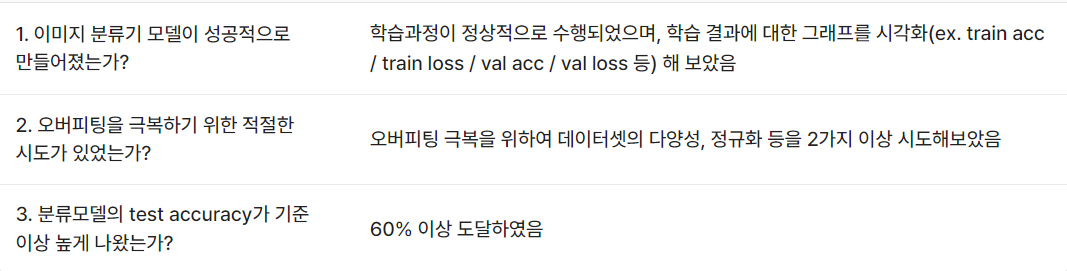

### 회고

__어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유__
  
validation 데이터를 train에서 split할 지, 새로운 데이터를 validation에 넣을 지 고민했었는데 후자를 처음에 선택했다가 커널에서 압축해제하는 방식이 익숙하지 않아서 시행착오를 겪었다. 결국에 전자를 선택해서 train 데이터에 모두 넣고 split을 했다. 비율도 0.3으로 했다가 0.2로 줄였다. 검증데이터가 꽤 많은 편이라는 말을 듣고 줄였는데, 보통 어느 정도로 검증 데이터를 하는 건지, 왜 그 비율로 하는 건지 궁금하다.
  
__프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점__
  
분류 모델의 test accuracy가 실행할 때 마다 달라지는 게 어렵고, 이유도 모르겠다. 총 다섯 번을 실행했는데, data augmentation과 dropout을 적용한 모델이 0.625로 제일 좋은 성능을 보였지만, 아무것도 적용하지 않은 모델이 기록해두진 못했지만 0.7이 나오는 경우도 있었다. 데이터셋을 살펴본 결과 테스트 데이터에는 총 6명의 데이터가 있는데 그 중에는 가위를 엄지와 새끼로 내는 사람도 있고 거의 움직임 없이 그저 100장을 찍은 사람도 있었다. 아무래도 거의 움직임이 없는 데이터가 train에서 학습된 경우 다양한 손 모양을 분류하진 못했을 것 같다. 추측만 할 수 있을 뿐 정확도가 매번 달라지는 건 정확히 모르겠다.
  
__루브릭 평가 지표를 맞추기 위해 시도한 내용__
  
이전 프로젝트에서 시각화를 위해 코드를 가져왔다. 오버피팅 극복을 위해 사람들의 손을 모아서 데이터셋을 늘렸고, Data augmentation도 했고, dropout도 적용했고, earlystopping도 적용했다. 분류모델의 accuracy가 돌릴 때마다 달라서 5번 정도 시도했고 최종적으로 early stopping, data augmentation과 dropout을 모두 적용한 모델이 0.625라는 성능을 보였다.

__자기 다짐, 프로젝트를 진행하면서 느낀점__
  
딥러닝으로 분류 문제를 해결하는 코드를 직접 만들어보니 얼마나 부정확할 수 있는 지 느꼈고 알고리즘에 의한 결과를 완전히 믿으면 안되겠다는 생각을 했다. [알고리즘의 편견] https://www.netflix.com/kr/title/81328723
  
이 다큐멘터리를 보면서 사람들이 부정확한 알고리즘을 너무 신뢰했기 때문에 일상생활에서 부조리한 일들이 발생하는 걸 알았다. 영국에서는 길거리에 경찰이 타고 있는 차 한 대가 시민들의 얼굴을 감시하면서 범죄자인지 아닌 지 구분하는 알고리즘을 사용해서 범죄자라고 판단된 경우 경찰이 차에서 나와 바로 출동한다. 그런데 그 알고리즘이 선택한 아무 잘못도 없는 14살짜리 흑인 남자애가 4명의 사복경찰들한테 20분간 둘러싸여서 범죄자인지 아닌지 확인해야한다며 지문을 채취당했다. 그 애는 당연히 범죄자가 아니었고, 그 알고리즘 모델이 정확도가 매우 떨어지는데도 불구하고 버릴 생각을 못하고 있는 게 이상하다고 생각했다.
  
내가 이 모델의 테스트 데이터에는 여자 손 하나와 남자 손 하나로 50:50으로 맞췄는데, 훈련 데이터에는 여자 손과 남자 손의 비율이 1대2다.(훈련데이터와 테스트데이터의 사람은 겹치지 않는다.) 아무래도 이런 점이 성능을 떨어뜨렸다고 생각한다. 모델은 데이터가 너무 많고 정제되지 않은 현실 세계를 감당하기에 성능이 떨어진다. 내가 정제할 수 있는 데이터들도 수작업으로 조정하기 귀찮아서 그냥 두는 데, 실제로 상용화를 위한 모델의 데이터는 너무 많아서 수작업으로 일일이 봐주기 힘들 것 같다.
  
인공지능의 성능이라는 건 어떤 데이터를 가져오더라도 안정적으로 잘 맞출 때 좋다고 할 수 있을 것 같다. 지금 한 프로젝트처럼 정확도가 들쑥날쑥한 결과는 당연하고 정확도가 높은 모델을 나중에 만들더라도 그걸 잘 만들었다고 생각하진 말아야겠다.